In [1]:
import csv
import os

def get_csv_files(basic_path):
    files = os.listdir(basic_path)
    return [file for file in files if file.endswith('.csv')]

def open_csv_to_list(csv_path):
    with open(csv_path) as csvfile:
        my_reader = csv.reader(csvfile)
        return [row for row in my_reader]
    
def find_index_region(source, region):
    col = source[0].index(region)
    return col

def match(source1, source2, regions, months):
    registration_list = [] 
    usage_list = []
    for region in regions:
        col1 = find_index_region(source1, region)
        col2 = find_index_region(source2, region)
        for i in range(1, months):
            registration_list.append([float(source1[i][col1])])
            usage_list.append([float(source2[i][col2])])
    return registration_list, usage_list

In [2]:
basic_path = './'
registration = open_csv_to_list('location_registration.csv')
usage = open_csv_to_list('location_region.csv')

In [3]:
registration_num, usage_num = match(registration, usage, ['서울', '인천', '경기'], 24)

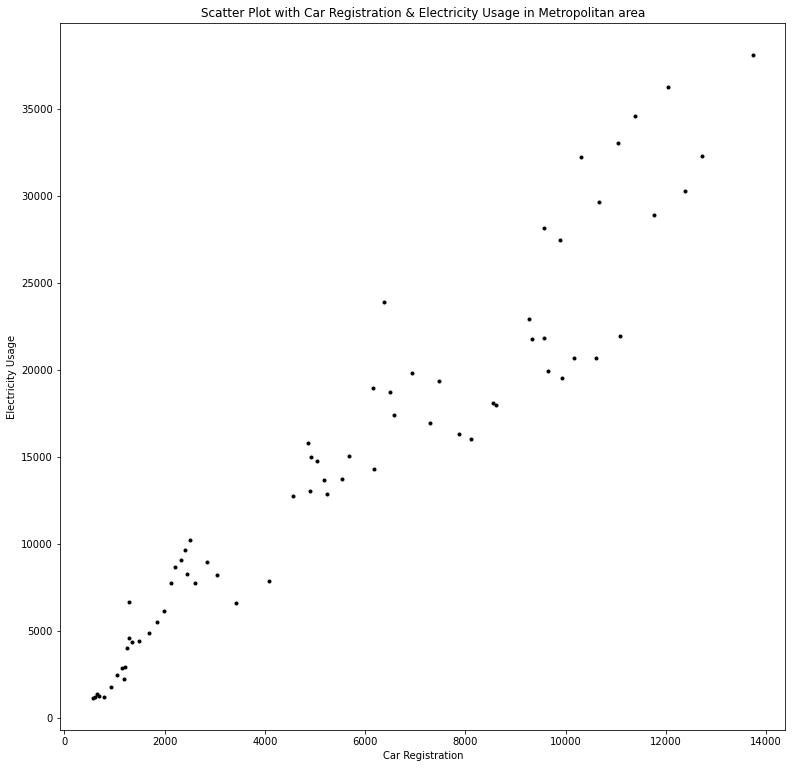

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 13))
plt.plot(registration_num, usage_num, 'k.')
plt.title('Scatter Plot with Car Registration & Electricity Usage in Metropolitan area')
plt.xlabel('Car Registration')
plt.ylabel('Electricity Usage')
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(registration_num, usage_num)

LinearRegression()

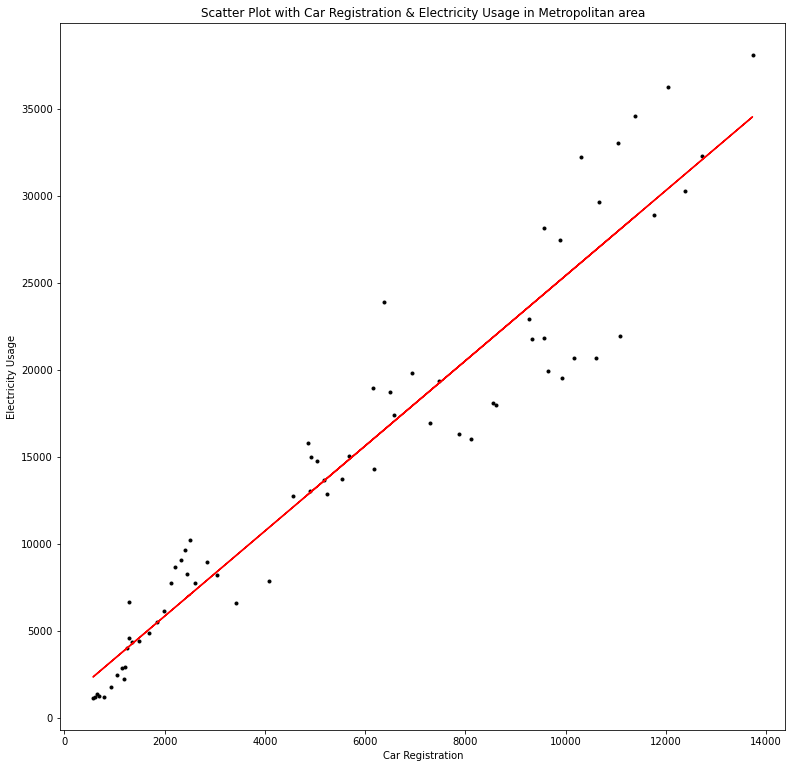

In [6]:
plt.figure(figsize=(13, 13))
plt.plot(registration_num, usage_num, 'k.')
plt.title('Scatter Plot with Car Registration & Electricity Usage in Metropolitan area')
plt.xlabel('Car Registration')
plt.ylabel('Electricity Usage')
plt.plot(registration_num, model.predict(registration_num), color='r')
plt.show()

In [7]:
print("Model Accuracy in Traing Set: ", model.score(registration_num, usage_num))

import pickle
filename = 'RegistrationAndUsage_model.sav'
pickle.dump(model, open(filename, 'wb'))
# loaded_model = pickle.load(open(filename, 'wb'))

Model Accuracy in Traing Set:  0.9151778036718689
